In [1]:
# Data handling and numerical operations
import pandas as pd                                 # Data manipulation and analysis
import numpy as np                                  # Numerical operations

# Data visualization
import matplotlib.pyplot as plt                     # Plotting graphs
import seaborn as sns                               # Advanced data visualization

# Scikit-learn
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Bidirectional, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Utility libraries
%matplotlib inline
# Downloading NLTK resources
# nltk.download('stopwords')

# Other libraries
from scipy.stats import skew, kurtosis, iqr
import logging

# Setting up the environment
pd.set_option('display.max_colwidth', None)
plt.rcParams['figure.dpi'] = 500
sns.set_style("whitegrid", {'axes.grid' : False})
logging.basicConfig(level=logging.WARNING, format='%(asctime)s - %(levelname)s - %(message)s')

In [2]:
df = pd.read_feather("../Data/Data145.feather")

In [3]:
df.head(10)

,text,sentiment,base_url
0,video offic mind busi david solomon tell gs intern learn wa,0,twitter.com
1,price lumber lb f sinc hit ytd high maci turnaround still happen,0,twitter.com
2,say american dream dead,-1,buff.ly
3,barri silbert extrem optimist bitcoin predict new crypto entrant go zero,1,twitter.com
4,satellit avoid attack space junk circl earth paid,-1,on.forbes.com
5,david butler favorit fang stock realmoneysod alphabet facebook,0,bit.ly
6,miss convo one favorit thinker,0,twitter.com
7,u intellig document nelson mandela made public,0,reut.rs
8,senat want emerg alert go netflix spotifi etc,1,tcrn.ch
9,hedg fund manag marc larsi say bitcoin k possibl,0,on.mktw.net


In [4]:
X = df[['text', 'base_url']]
Y = df['sentiment']

In [5]:
le =LabelEncoder()
y = le.fit_transform(Y)
y

array([1, 1, 0, ..., 2, 2, 0])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train

,text,base_url
2414,redwood invest cut global pmt gpn stake market valu declin assur aiz sharehold tobam lift,twitter.com
2794,made k morn option trade yasss czr ung aaba pep cvx ual,Optionsbypros.com
11427,myl pay royalti abbv licens humira patent biosimilar product launch,crweworld.com
5207,insid sell republ servic rsg cfo sell share stock,theenterpriseleader.com
592,short sale volum short interest mdlz gi hsi cpb cag,shortvolumes.com
...,...,...
11964,gden make new high alert buy writeup sent last night,twitter.com
21575,day amazon amzn went public onto nasdaq ipo invest amazon ipo held today current million,twitter.com
5390,lyb max pain matur maxpain option,maximum-pain.com
860,ep wec energi group inc wec expect,reurope.com


In [8]:
# Concatenate text and company names data with special tag
X_train_combined = X_train['text'] +' <EOF> ' + X_train['base_url']
X_test_combined = X_test['text'] + ' <EOF> ' + X_test['base_url']

In [9]:
X_test_combined

8059                       parker aerospac gkn aerospac sign technolog develop agreement premarket ph <EOF> seekingalpha.com
20482                                                        oil go back also think chk sn two lucr high b <EOF> twitter.com
21224                 oke oneok inc oneok inc updat credit analysi invest led growth reduc leverag premier <EOF> twitter.com
5194     jefferi financi group broker lower earn estim discoveri commun inc common stock disca <EOF> thelincolnianonline.com
134                                                mt flr team select canadian us gordi howe bridg project <EOF> twitter.com
                                                                ...                                                         
16705                                                                 ex div remind conocophillip cop dividend <EOF> dlvr.it
4894                      amazon move data switch could tackl cisco junip arista anet csco jnpr amzn <EOF> www.investors.com


In [10]:

# Tokenization and Padding

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_combined)
X_train_seq = tokenizer.texts_to_sequences(X_train_combined)
X_test_seq = tokenizer.texts_to_sequences(X_test_combined)


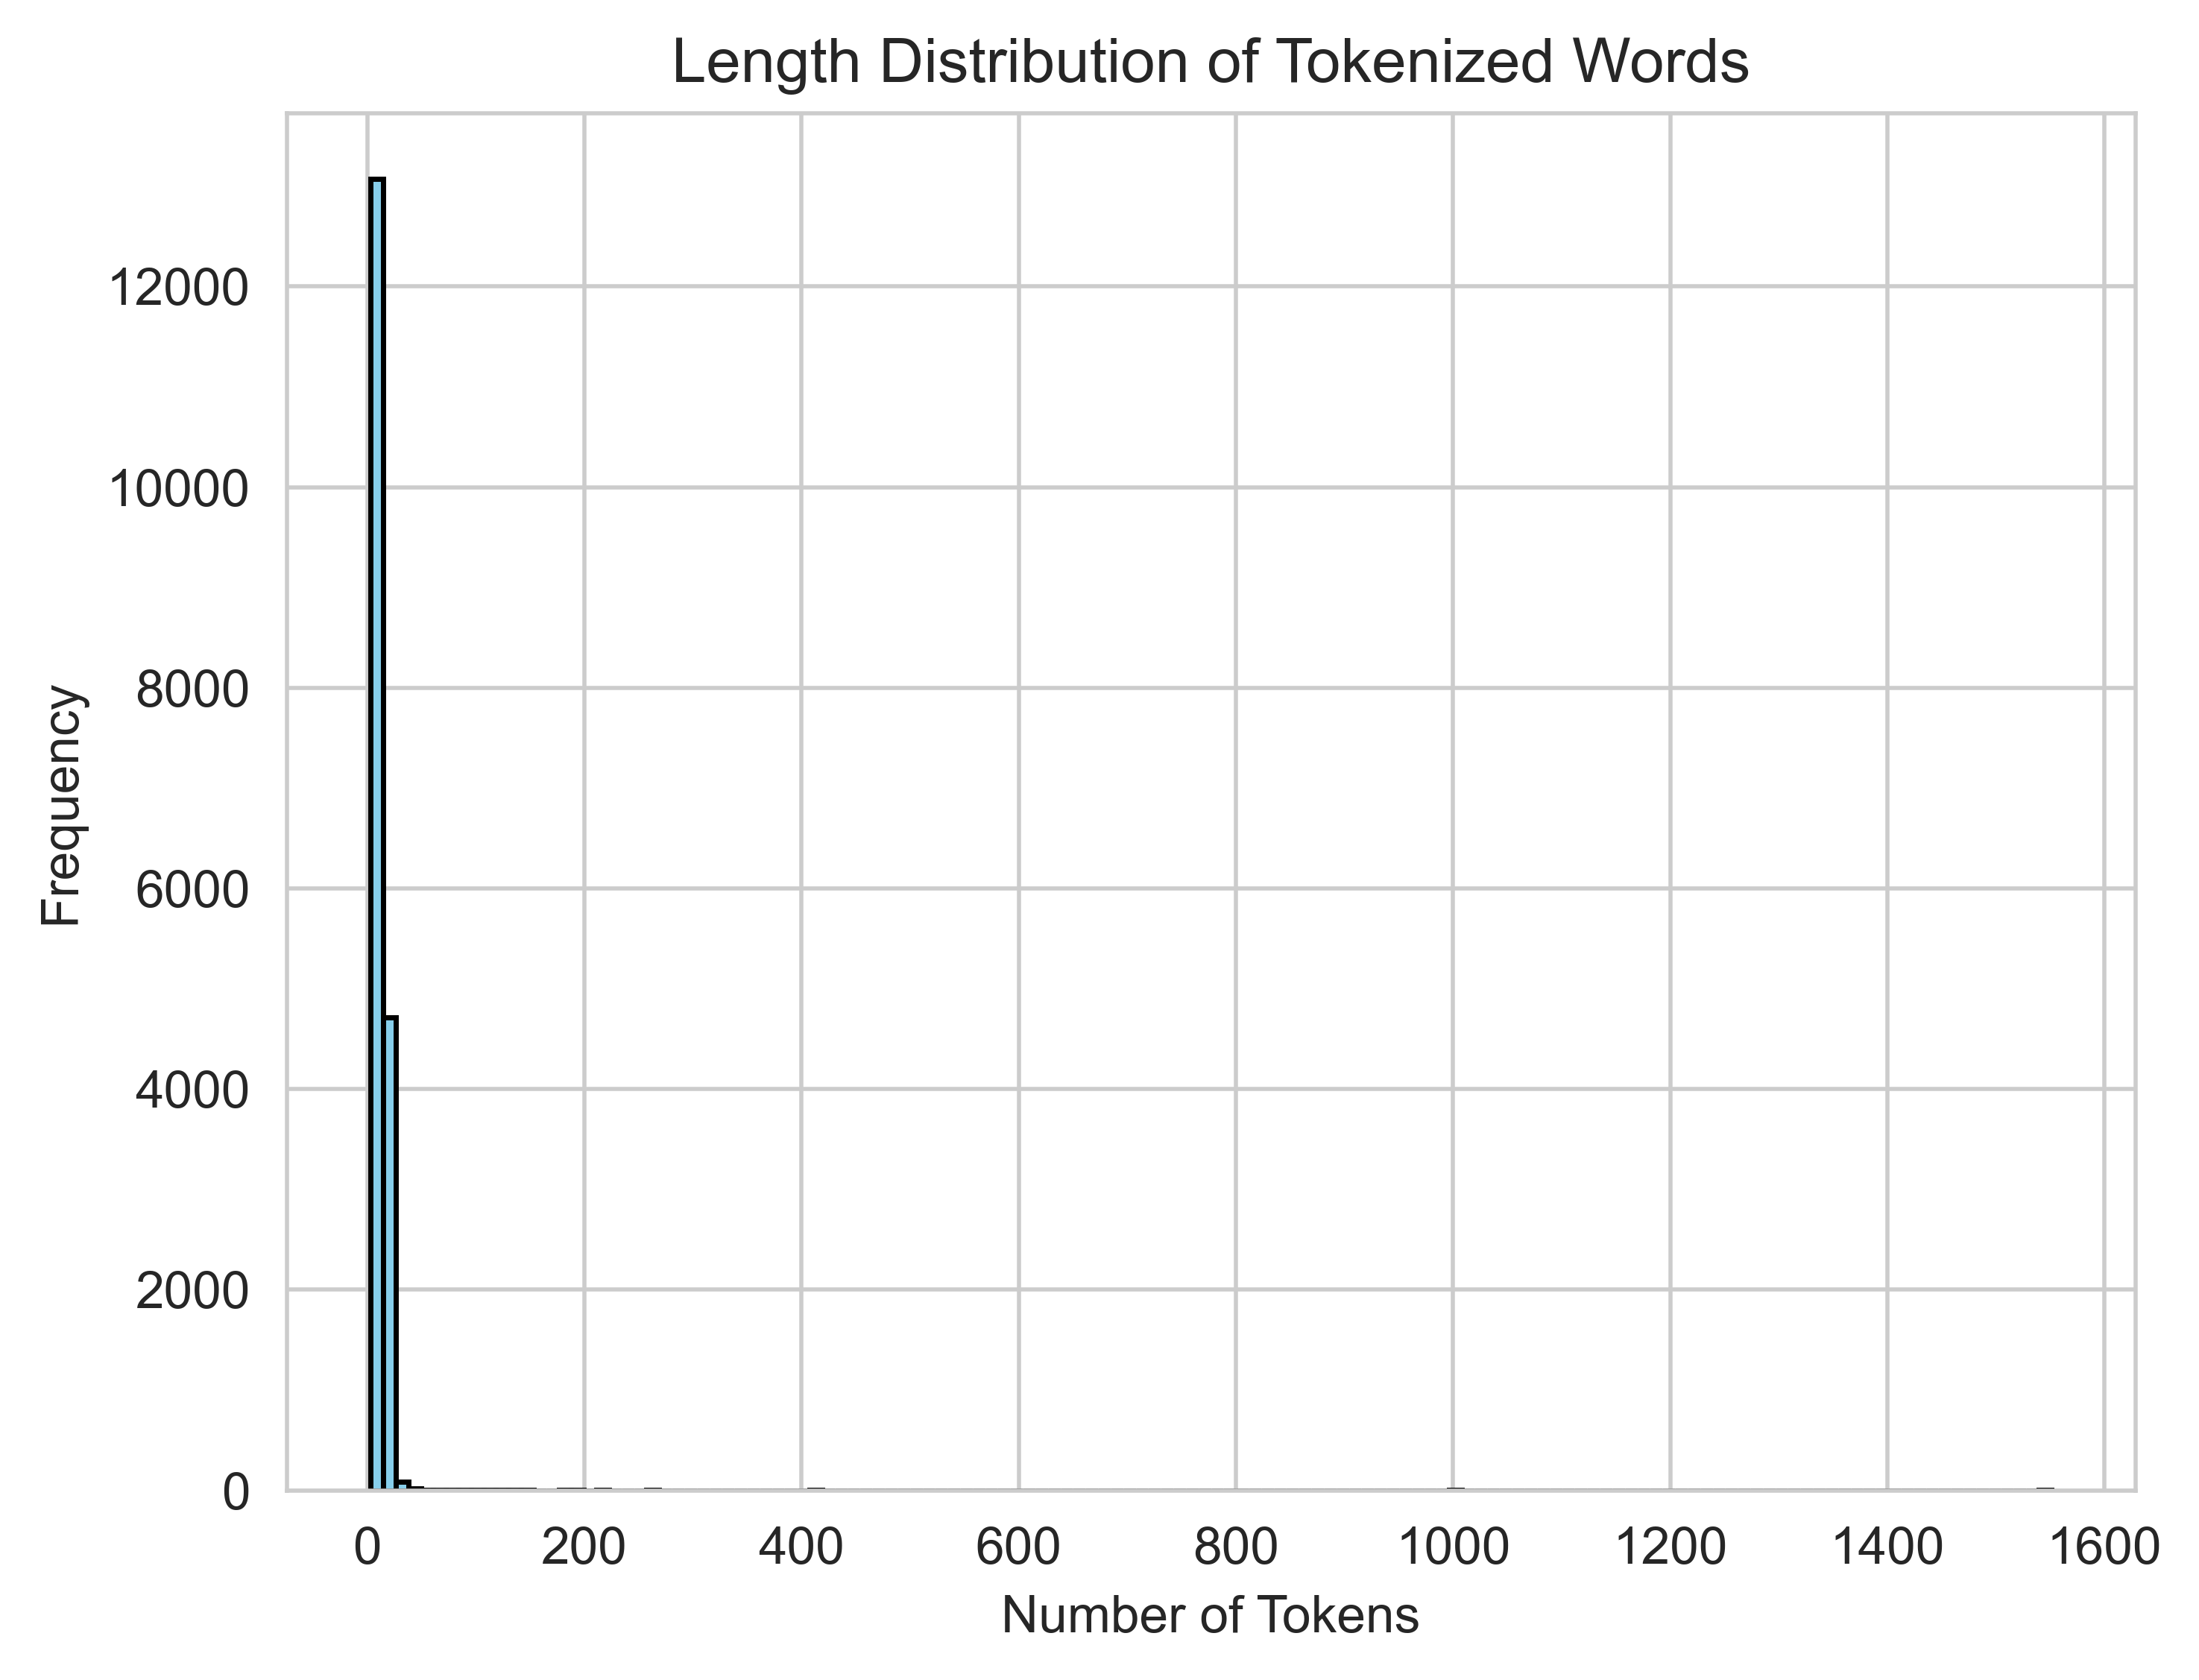

In [11]:
import math
# checking the max length required for padding
token_lengths = [len(tokens) for tokens in X_train_seq]
plt.hist(token_lengths, bins=math.ceil(np.sqrt(len(token_lengths))), color='skyblue', edgecolor='black')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Length Distribution of Tokenized Words')
plt.grid(True)
plt.show()


In [12]:
np.mean(token_lengths)+ np.std(token_lengths)

28.592027095451428

In [13]:

max_sequence_length = 30
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='pre')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='pre')
# parameters for LSTM model
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
num_classes = len(set(y_train))

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [15]:

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train model
history = model.fit(X_train_pad, y_train, epochs=10, validation_split=0.2)
# Evaluate model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.7323 - loss: 0.6362 - val_accuracy: 0.9203 - val_loss: 0.2249
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9646 - loss: 0.1016 - val_accuracy: 0.9389 - val_loss: 0.2173
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9837 - loss: 0.0478 - val_accuracy: 0.9367 - val_loss: 0.2162
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9914 - loss: 0.0279 - val_accuracy: 0.9420 - val_loss: 0.2288
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9925 - loss: 0.0252 - val_accuracy: 0.9362 - val_loss: 0.2923
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9955 - loss: 0.0179 - val_accuracy: 0.9359 - val_loss: 0.3011
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9960 - loss: 0.0142 - val_accuracy: 0.9406 - val_loss: 0.3117
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9963 - loss: 0.0111 - 

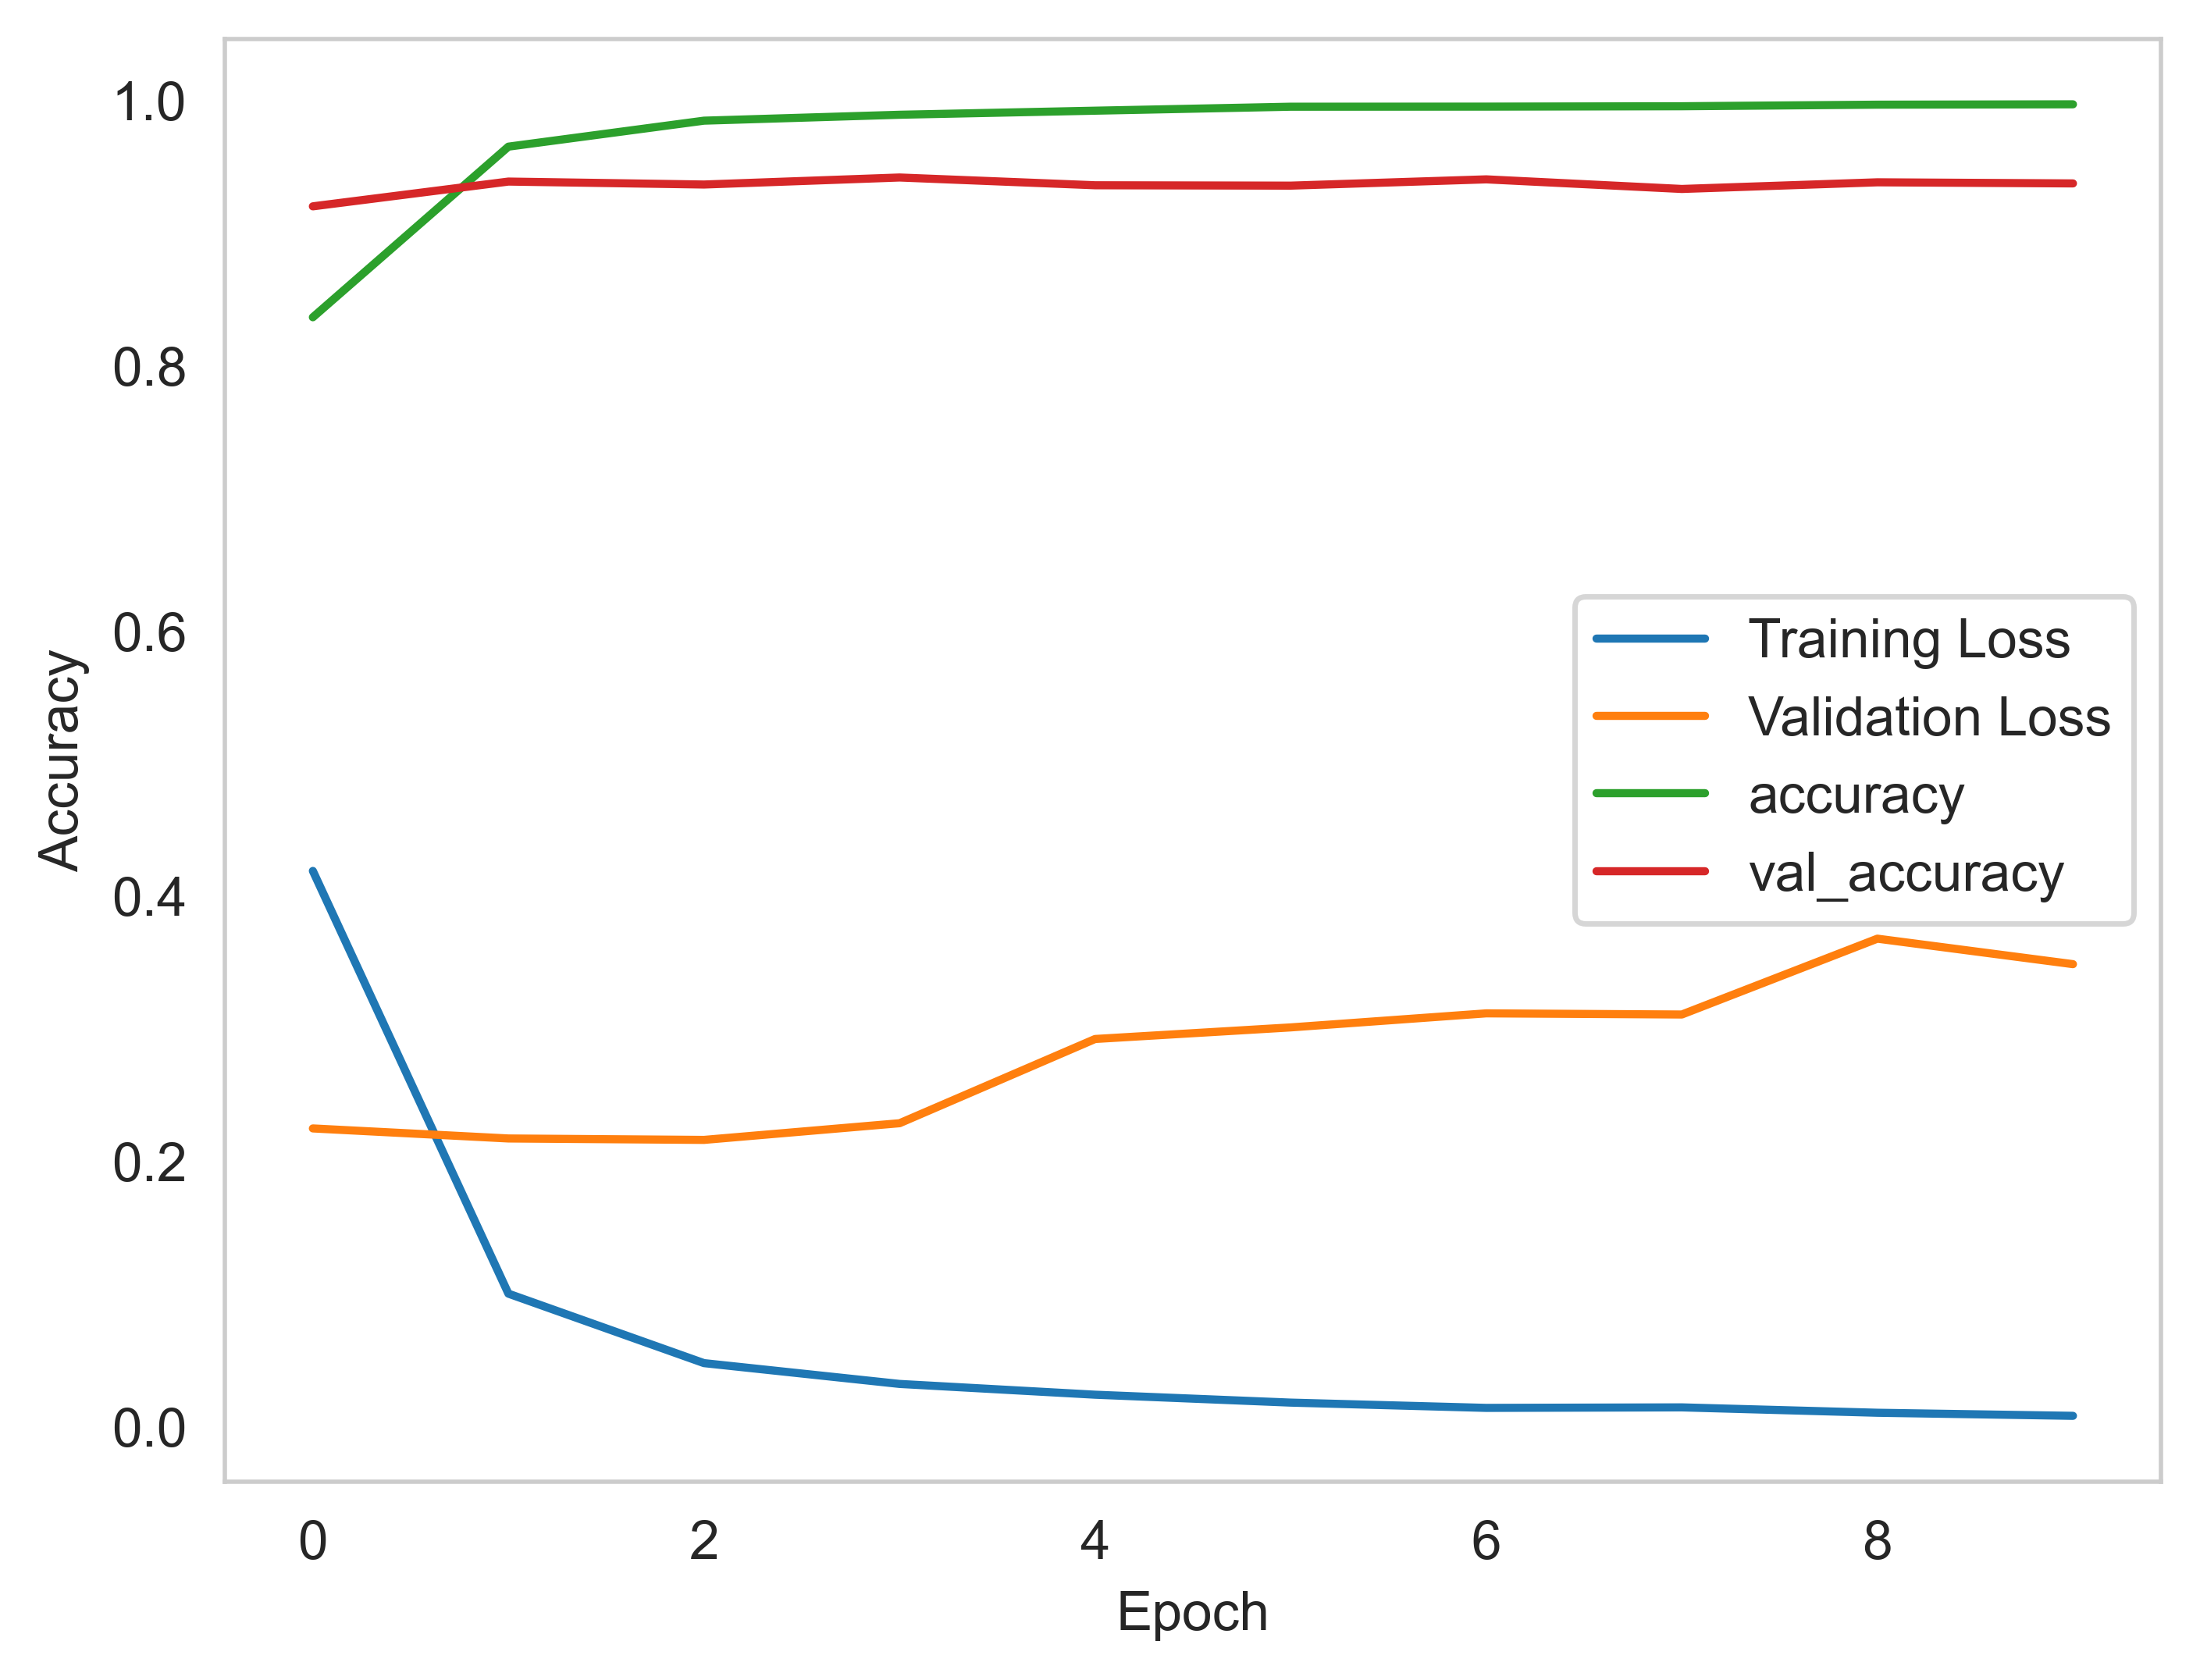

In [17]:
# Visualize training history (optional)
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


In [18]:
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([2, 1, 2, ..., 2, 1, 1])

In [19]:
cm_cnn = confusion_matrix(y_test, y_pred_classes)
cm_cnn

array([[ 378,   63,   50],
       [  31, 2529,   27],
       [  21,   65, 1320]])

In [20]:
# printing confusion matrix
def plot_conf_mat(cm):
    class_names=['Negative', 'Neutral', 'Positive'] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, labels=[-1,0,1])
    plt.yticks(tick_marks, labels=class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

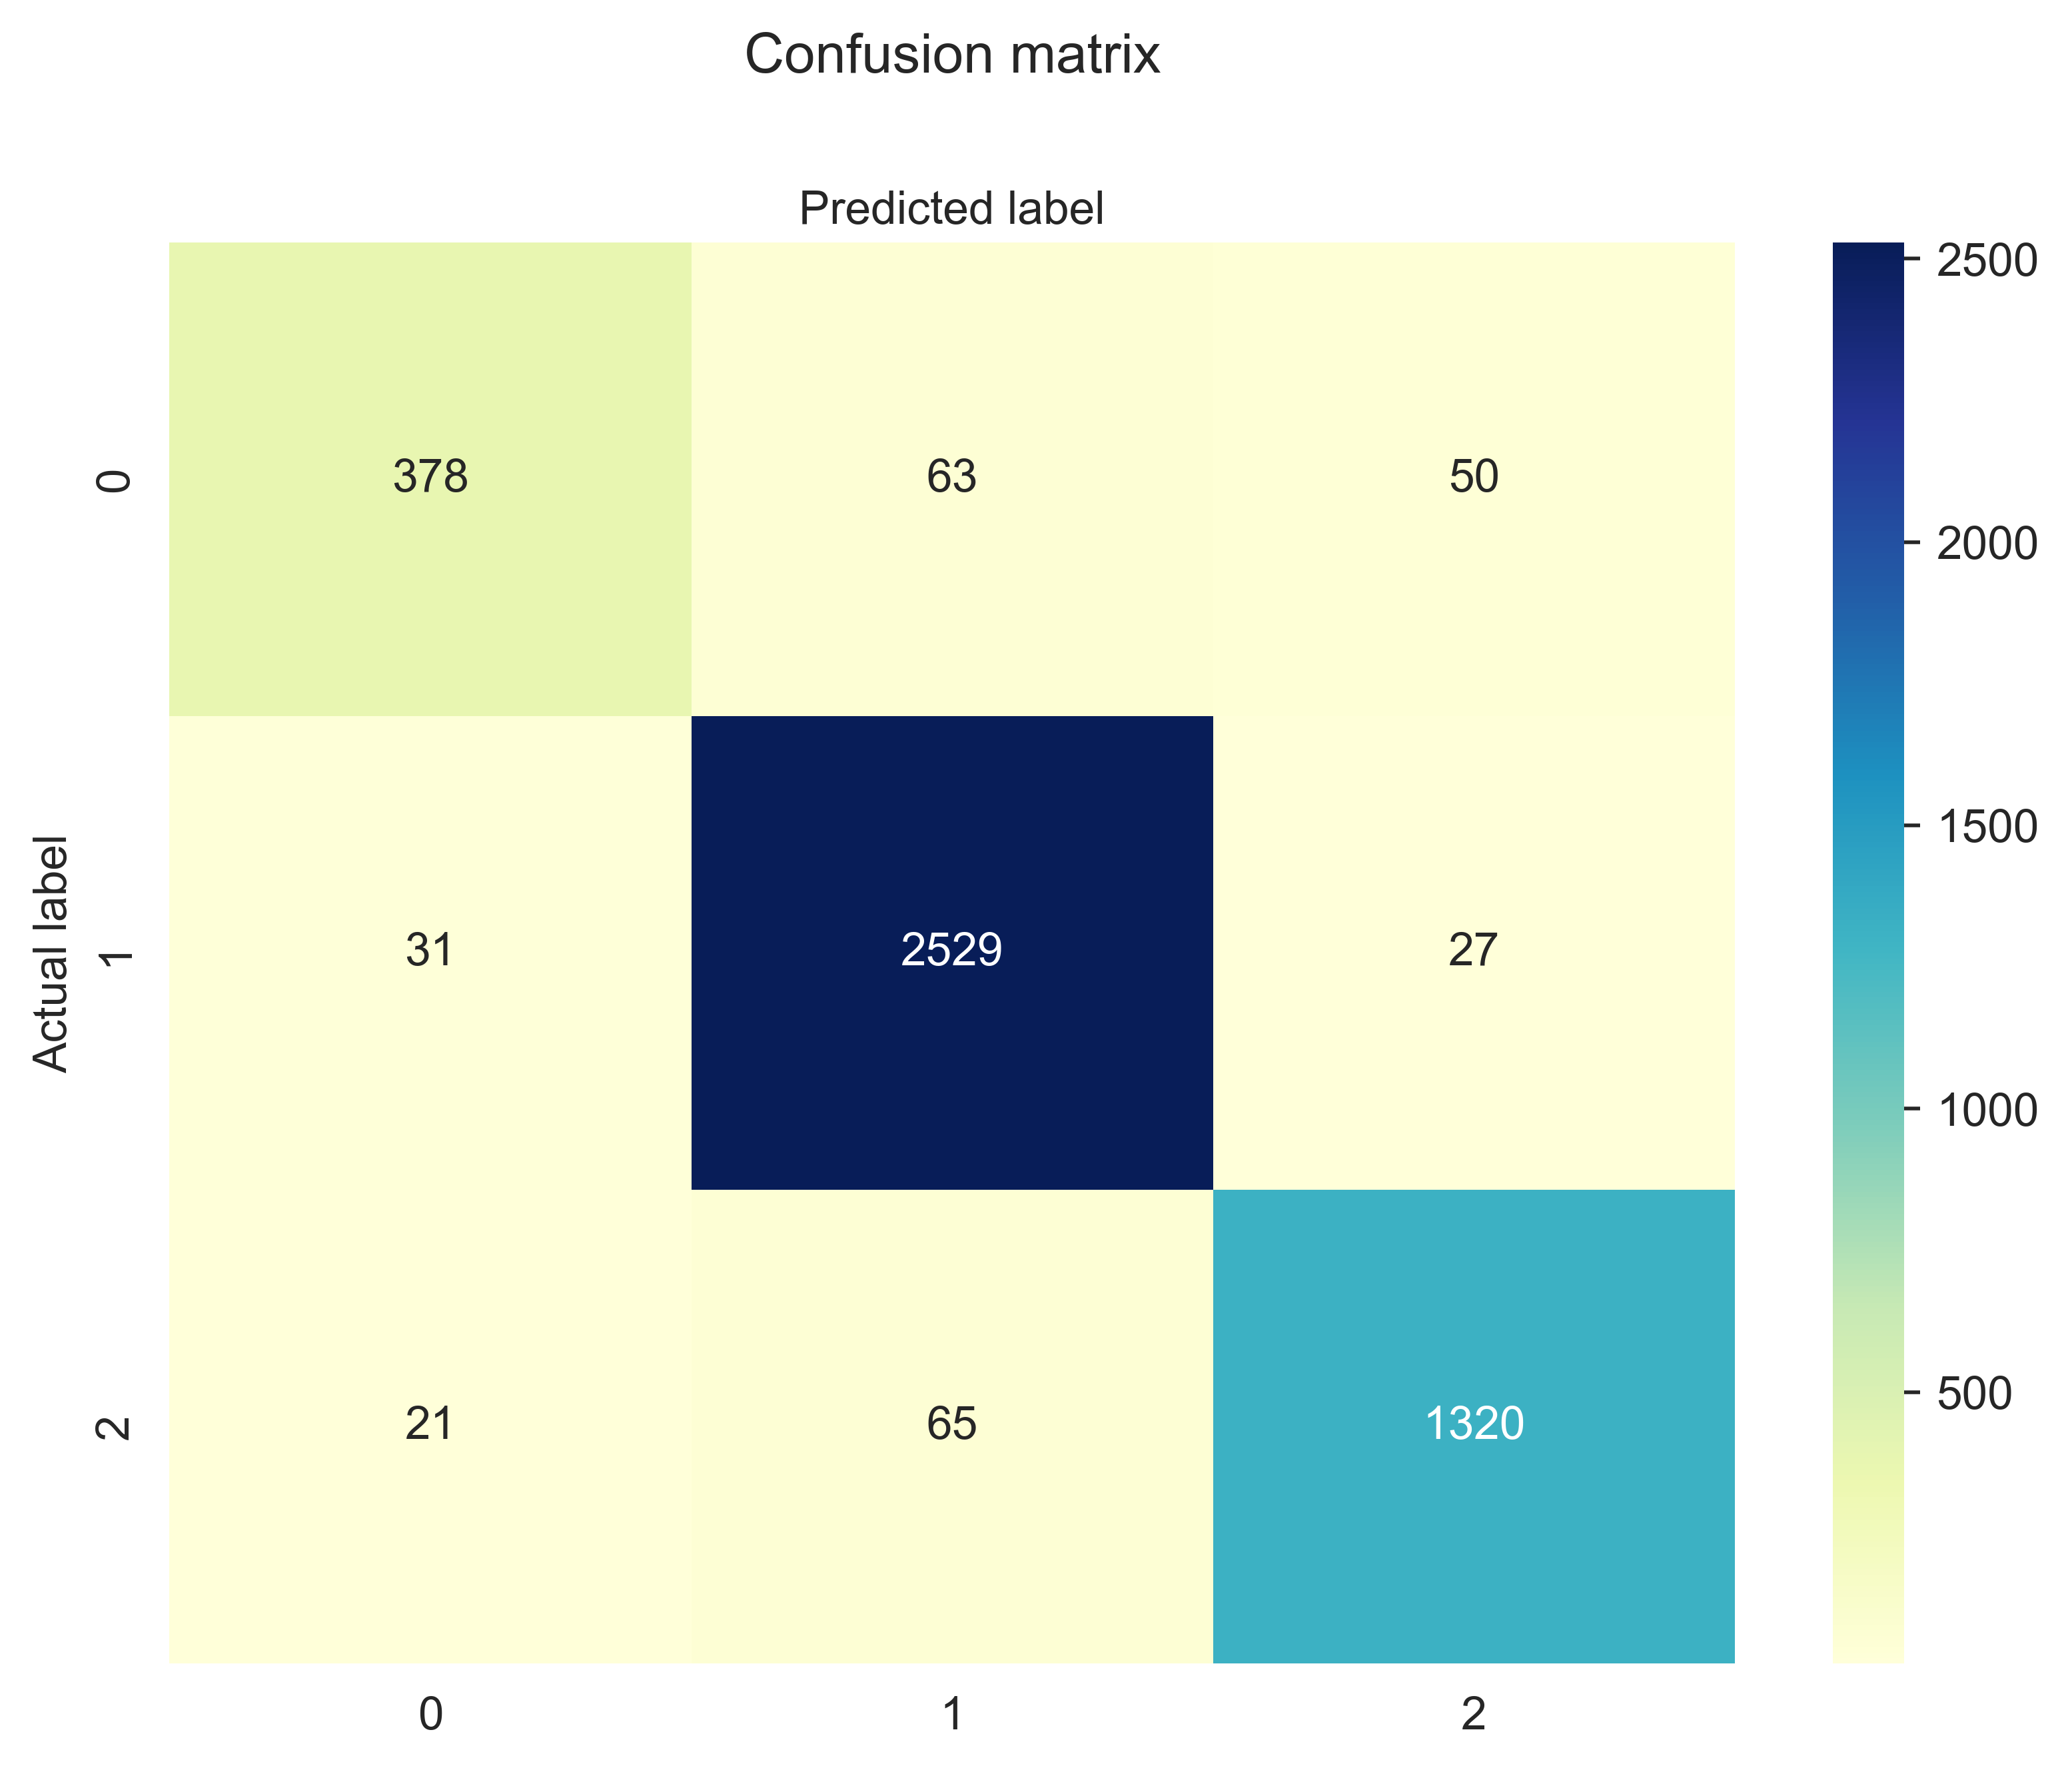

In [21]:
plot_conf_mat(cm_cnn)

In [22]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       491
           1       0.95      0.98      0.96      2587
           2       0.94      0.94      0.94      1406

    accuracy                           0.94      4484
   macro avg       0.93      0.90      0.91      4484
weighted avg       0.94      0.94      0.94      4484



## K-Fold Cross Validation

In [23]:
def create_model():
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [24]:
# Define number of folds
k_folds = 10

# Initialize lists to store per-fold histories
fold_accuracies = []
fold_val_accuracies = []
fold_losses = []
fold_val_losses = []

# Initialize KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train_pad):
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_pad[train_index], X_train_pad[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Define and compile model
    model = create_model()  # Define your CNN model creation function
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(X_val_fold, y_val_fold))
    
    # Collecting accuracy and loss history
    fold_accuracies.append(history.history['accuracy'])
    fold_val_accuracies.append(history.history['val_accuracy'])
    fold_losses.append(history.history['loss'])
    fold_val_losses.append(history.history['val_loss'])

Epoch 1/10


253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6995 - loss: 0.6864 - val_accuracy: 0.9080 - val_loss: 0.2462
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9594 - loss: 0.1211 - val_accuracy: 0.9342 - val_loss: 0.2025
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9847 - loss: 0.0446 - val_accuracy: 0.9365 - val_loss: 0.2048
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9903 - loss: 0.0316 - val_accuracy: 0.9387 - val_loss: 0.2455
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9938 - loss: 0.0193 - val_accuracy: 0.9376 - val_loss: 0.2484
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9950 - loss: 0.0177 - val_accuracy: 0.9387 - val_loss: 0.2845
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9971 - loss: 0.0096 - val_accuracy: 0.9376 - val_loss: 0.2720
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9968 - loss: 0.0116 - val_accuracy: 0.

In [25]:
# Calculating mean of metrics across all folds
mean_accuracy = np.mean(fold_accuracies, axis=0)
mean_val_accuracy = np.mean(fold_val_accuracies, axis=0)
mean_loss = np.mean(fold_losses, axis=0)
mean_val_loss = np.mean(fold_val_losses, axis=0)

# Printing the mean accuracy and loss
print(f"Mean Training Accuracy: {mean_accuracy[-1]:.6f}")
print(f"Mean Validation Accuracy: {mean_val_accuracy[-1]:.6f}")
print(f"Mean Training Loss: {mean_loss[-1]:.6f}")
print(f"Mean Validation Loss: {mean_val_loss[-1]:.6f}")

Mean Training Accuracy: 0.997330
Mean Validation Accuracy: 0.941226
Mean Training Loss: 0.009472
Mean Validation Loss: 0.314551


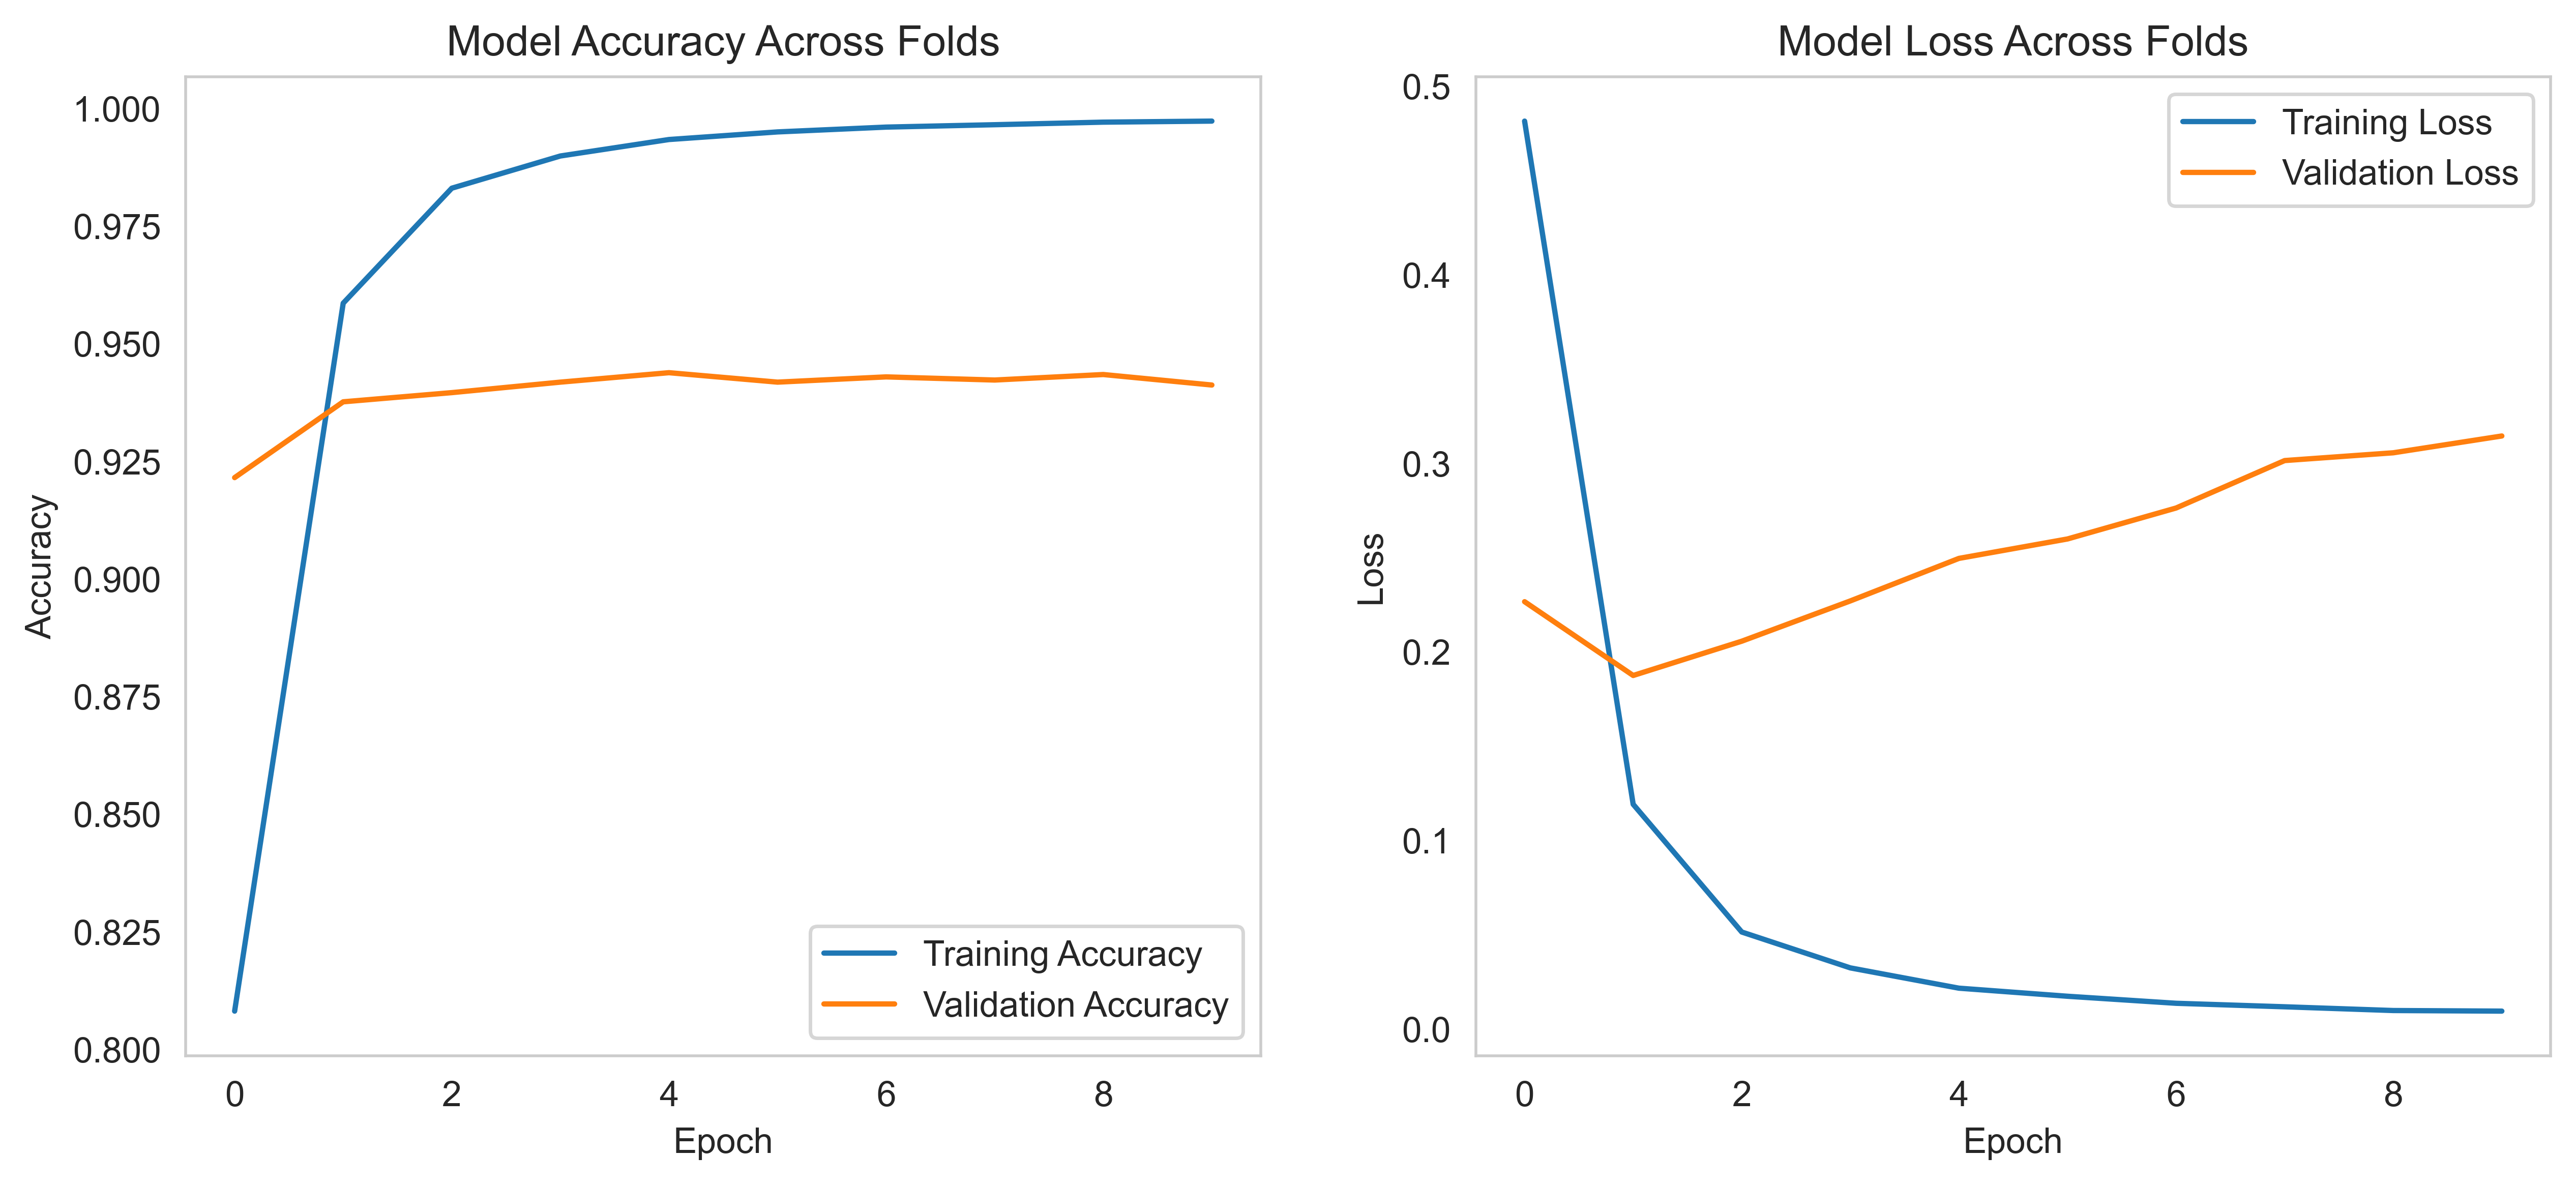

In [26]:
# Plotting model accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(mean_accuracy, label='Training Accuracy')
plt.plot(mean_val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy Across Folds')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(mean_loss, label='Training Loss')
plt.plot(mean_val_loss, label='Validation Loss')
plt.title('Model Loss Across Folds')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()